<a href="https://colab.research.google.com/github/parnika21/Prediction-Using-Supervised-Machine-Learning/blob/main/TSF_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported")

Data imported


In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

Trying to find a relation between hours studied and scores achieved in order to study the data.

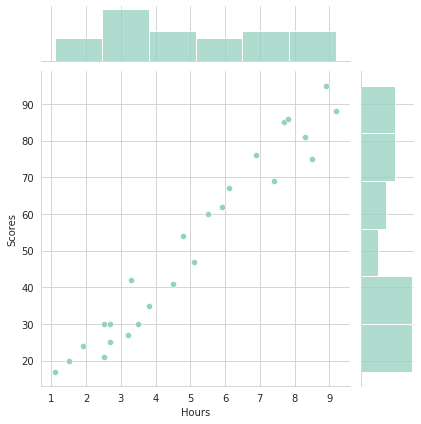

In [11]:
sns.jointplot(x='Hours',y='Scores',data=df)

 A 2D hex bin plot comparing Hours and Scores.

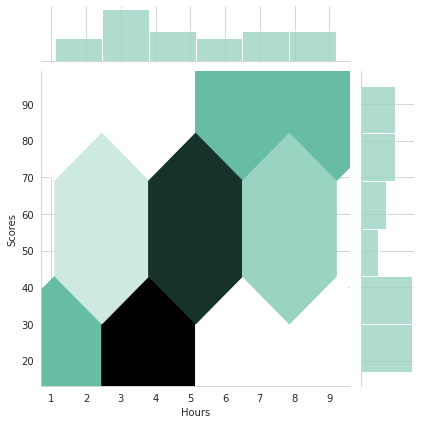

In [12]:
sns.jointplot(x='Hours',y='Scores',kind='hex',data=df)

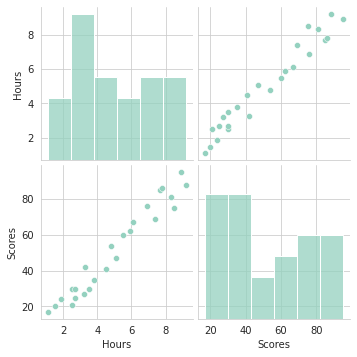

In [13]:
sns.pairplot(df)

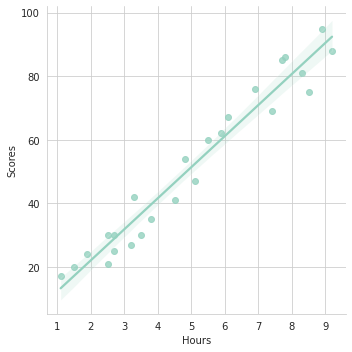

In [14]:
sns.lmplot(x='Hours',y='Scores',data=df)

This Straight line depicts direct proportionality relationship between hours studied and score achieved.

Now. after exploring the data, let us split the data into X(input data) and y(output data).

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Training our Linear regression model

In [3]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [4]:
lm =LinearRegression()

Fitting lm into the train data

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [9.78856669]


Predicting the the test data

In [19]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [20]:
predictions=lm.predict(X_test)

 Creating a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

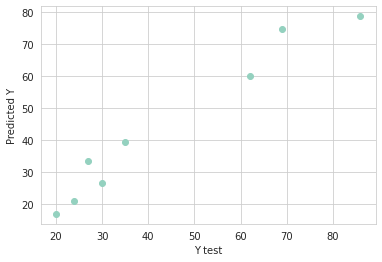

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [22]:
dfm = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
dfm

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Predicting scores when student studies for 9.25 hours in specific.

In [25]:
hours = 9.25
ans = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(ans[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


In [30]:
hours = 12
ans = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(ans[0]))

No of Hours = 12
Predicted Score = 119.83361562333043


In [31]:
hours = 2
ans = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(ans[0]))

No of Hours = 2
Predicted Score = 21.947948755839978


**Evaluating the model**

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predictions)) 

Mean Absolute Error: 4.419727808027651


Evaluating the model using Residuals to make sure that it looks normally distributed 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


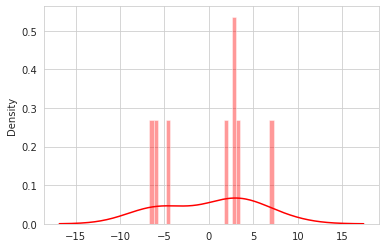

In [29]:
sns.distplot((y_test-predictions),bins=30,color="red");